In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tabulate import tabulate

# lots of scratchwork in here. Follow order of cells

In [2]:
#BULL
#Calpha-calpha, calpha-cbeta, sulfur-sulfur - ALL TOGETHER in the same frame.(Jesse's suggestion)
#WRONG CODE
temp_bull_s=pd.read_csv("bull_cys_tyr_dist.csv")
blank_df = pd.DataFrame()
for sim in temp_bull_s.sim.unique():
    temp_df = temp_bull_s[temp_bull_s.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
temp_bull_s = blank_df.copy()
del temp_df
del blank_df
temp_bull_s=temp_bull_s[temp_bull_s.sim!=15]
temp_bull_s=temp_bull_s[temp_bull_s.sim!=14]
temp_bull_calpha=pd.read_csv("bull_cys_tyr_dist_C_alpha.csv")
blank_df = pd.DataFrame()
for sim in temp_bull_calpha.sim.unique():
    temp_df = temp_bull_calpha[temp_bull_calpha.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
temp_bull_calpha = blank_df.copy()
del temp_df
del blank_df
temp_bull_calpha=temp_bull_calpha[temp_bull_calpha.sim!=15]
temp_bull_calpha=temp_bull_calpha[temp_bull_calpha.sim!=14]
temp_bull_calpha_cbeta=pd.read_csv("bull_cys_tyr_c_alpha_c_beta.csv")
blank_df = pd.DataFrame()
for sim in temp_bull_calpha_cbeta.sim.unique():
    temp_df = temp_bull_calpha_cbeta[temp_bull_calpha_cbeta.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
temp_bull_calpha_cbeta = blank_df.copy()
del temp_df
del blank_df
temp_bull_calpha_cbeta=temp_bull_calpha_cbeta[temp_bull_calpha_cbeta.sim!=15]
temp_bull_calpha_cbeta=temp_bull_calpha_cbeta[temp_bull_calpha_cbeta.sim!=14]
consecutive_pairs_s=[]
for i in range(2,len(temp_bull_s.columns)):
    first=int(temp_bull_s.columns[i].split(':')[1])
    second=int(temp_bull_s.columns[i].split(':')[2])
    if second-first==1:
        consecutive_pairs_s.append(temp_bull_s.columns[i])
    elif first-second==1:
        consecutive_pairs_s.append(temp_bull_s.columns[i])
max_s=temp_bull_s[consecutive_pairs_s].values.max()
max_calpha=7.5
max_calpha_cbeta=6.5
common_close_pairs=[]
temp_bull_combined=pd.concat([temp_bull_s,temp_bull_calpha,temp_bull_calpha_cbeta],axis=1)
temp_bull_combined=temp_bull_combined[temp_bull_combined.columns[temp_bull_combined.columns!='frames']]
temp_bull_combined=temp_bull_combined[temp_bull_combined.columns[temp_bull_combined.columns!='sim']]
s_calpha_cbeta_index=[[i, element] for i,element in enumerate(temp_bull_combined.columns)]
calpha_index=[]
calpha_cbeta_index=[]
for pair in s_calpha_cbeta_index:
    if '@CA' in pair[1]:
        calpha_index.append(pair[0])
        break
for pair in s_calpha_cbeta_index:
    if 'CB' in pair[1]:
        calpha_cbeta_index.append(pair[0])
        break
first_part=temp_bull_combined.iloc[:,0:calpha_index[0]]<=max_s
second_part=temp_bull_combined.iloc[:,calpha_index[0]:(calpha_cbeta_index[0])]<=max_calpha
third_part_pairs = temp_bull_combined.iloc[:,calpha_cbeta_index[0]:].columns
third_part_df    = temp_bull_combined.iloc[:,calpha_cbeta_index[0]:].copy()
j=0
final_pair=[int(third_part_pairs[len(third_part_pairs)-1].split('C')[0][1:len(third_part_pairs[len(third_part_pairs)-1].split('C')[0])]),
           int(third_part_pairs[len(third_part_pairs)-1].split('C')[1][2:len(third_part_pairs[len(third_part_pairs)-1].split('C')[1])])]
for column in range(len(third_part_pairs)):
    if j==0:
        first_first=int(third_part_pairs[column].split('C')[0][1:len(third_part_pairs[column].split('C')[0])])
        second_first=int(third_part_pairs[column].split('C')[1][2:len(third_part_pairs[column].split('C')[1])])
        first_second=int(third_part_pairs[column+1].split('C')[0][1:len(third_part_pairs[column+1].split('C')[0])])
        second_second=int(third_part_pairs[column+1].split('C')[1][2:len(third_part_pairs[column+1].split('C')[1])])
        if third_part_df[third_part_df<=max_calpha_cbeta][third_part_pairs[column]].isnull().all()==True and third_part_df[third_part_df<=max_calpha_cbeta][third_part_pairs[column+1]].isnull().all()==True:
            third_part_df.drop([third_part_pairs[column],third_part_pairs[column+1]],axis=1,inplace=True)
    elif j>0:
        first_first=int(third_part_pairs[column+j].split('C')[0][1:len(third_part_pairs[column+j].split('C')[0])])
        second_first=int(third_part_pairs[column+j].split('C')[1][2:len(third_part_pairs[column+j].split('C')[1])])
        first_second=int(third_part_pairs[column+j+1].split('C')[0][1:len(third_part_pairs[column+j+1].split('C')[0])])
        second_second=int(third_part_pairs[column+j+1].split('C')[1][2:len(third_part_pairs[column+j+1].split('C')[1])])
        if third_part_df[third_part_df<=max_calpha_cbeta][third_part_pairs[column+j]].isnull().all()==True and third_part_df[third_part_df<=max_calpha_cbeta][third_part_pairs[column+j+1]].isnull().all()==True:
            third_part_df.drop([third_part_pairs[column+j],third_part_pairs[column+j+1]],axis=1,inplace=True)
        if [first_second,second_second]==final_pair:
            break
    j+=1
first_part=temp_bull_combined.iloc[:,0:calpha_index[0]][first_part]
second_part=temp_bull_combined.iloc[:,calpha_index[0]:(calpha_cbeta_index[0])][second_part]
temp_bull_s_calpha_cbeta_conditionpairs=pd.concat([pd.concat([first_part,second_part],axis=1).dropna(axis=1,how='all'),third_part_df],axis=1)
del first_part, second_part, third_part_df

s_calpha_cbeta_index=[[i, element] for i,element in enumerate(temp_bull_s_calpha_cbeta_conditionpairs.columns)]
calpha_index=[]
calpha_cbeta_index=[]
for pair in s_calpha_cbeta_index:
    if '@CA' in pair[1]:
        calpha_index.append(pair[0])
        break
for pair in s_calpha_cbeta_index:
    if 'CB' in pair[1]:
        calpha_cbeta_index.append(pair[0])
        break
first_part=temp_bull_s_calpha_cbeta_conditionpairs.iloc[:,:calpha_index[0]]
second_part=temp_bull_s_calpha_cbeta_conditionpairs.iloc[:,calpha_index[0]:calpha_cbeta_index[0]]
third_part=temp_bull_s_calpha_cbeta_conditionpairs.iloc[:,calpha_cbeta_index[0]:]
nonconsecutive_residues_s=[]
nonconsecutive_residues_calpha=[]
nonconsecutive_residues_calpha_cbeta=[]
for i in range(0,len(first_part.columns)):
    first=int(first_part.columns[i].split(':')[1])
    second=int(first_part.columns[i].split(':')[2])
    if abs(second-first)!=1:
        nonconsecutive_residues_s.append([[first,second],first_part.columns[i]])
for i in range(0,len(second_part.columns)):
    first=int(second_part.columns[i].split('@CA')[0][1:len(second_part.columns[i].split('@CA')[0])])
    second=int(second_part.columns[i].split('@CA')[1][1:len(second_part.columns[i].split('@CA')[1])])
    if abs(first-second)!=1:
        nonconsecutive_residues_calpha.append([[first,second],second_part.columns[i]])
for i in range(0,len(third_part.columns)):
    first=int(third_part.columns[i].split('C')[0][1:len(third_part.columns[i].split('C')[0])])
    second=int(third_part.columns[i].split('C')[1][2:len(third_part.columns[i].split('C')[1])])
    if abs(second-first)!=1:
        nonconsecutive_residues_calpha_cbeta.append([[first,second],third_part.columns[i]])
residue_s_list=[residue_pair[0] for residue_pair in nonconsecutive_residues_s]
residue_calpha_list=[residue_pair[0] for residue_pair in nonconsecutive_residues_calpha]
residue_calpha_cbeta_list=[residue_pair[0] for residue_pair in nonconsecutive_residues_calpha_cbeta]
common_close_pairs=[]
#because i am expecting nonconsecutive_residues_calpha_cbeta to be biggest since it has Calpha-Cbeta and Cbeta-Calpha pairs
for pair in residue_calpha_cbeta_list:
    if pair in residue_s_list:
        if pair in residue_calpha_list:
            common_close_pairs.append(pair)
common_close_pairs_all=[]
for pair in nonconsecutive_residues_s:
    if pair[0] in common_close_pairs:
        common_close_pairs_all.append(pair[1])
for pair in nonconsecutive_residues_calpha:
    if pair[0] in common_close_pairs:
        common_close_pairs_all.append(pair[1])
for pair in nonconsecutive_residues_calpha_cbeta:
    if pair[0] in common_close_pairs:
        common_close_pairs_all.append(pair[1])
merged_s_calpha_cbeta = pd.concat([first_part,second_part,third_part],axis=1)
merged_s_calpha_cbeta_commonpairs=pd.concat([pd.concat([temp_bull_s,temp_bull_calpha,temp_bull_calpha_cbeta],axis=1)['sim'].iloc[:,0],
                                            merged_s_calpha_cbeta[common_close_pairs_all]],axis=1)
merged_s_calpha_cbeta_commonpairs_commonframes_all=list()
merged_s_calpha_cbeta_commonpairs_commonframes_first=list()
merged_s_calpha_cbeta_commonpairs_commonframes_second=list()
merged_s_calpha_cbeta_commonpairs_commonframes_combined=list()
s_calpha_cbeta_index=[[i+1, element] for i,element in enumerate(merged_s_calpha_cbeta_commonpairs.iloc[:,1:].columns)]
calpha_index=[]
calpha_cbeta_index=[]
for pair in s_calpha_cbeta_index:
    if '@CA' in pair[1]:
        calpha_index.append(pair[0])
        break
for pair in s_calpha_cbeta_index:
    if 'CB' in pair[1]:
        calpha_cbeta_index.append(pair[0])
        break
for i,j,k in zip(range(1,len(merged_s_calpha_cbeta_commonpairs.columns[0:calpha_index[0]])),
              range(calpha_index[0],calpha_index[0]+len(merged_s_calpha_cbeta_commonpairs.columns[calpha_index[0]:calpha_cbeta_index[0]])),
                range(calpha_cbeta_index[0],calpha_cbeta_index[0]+len(merged_s_calpha_cbeta_commonpairs.columns[calpha_cbeta_index[0]:len(merged_s_calpha_cbeta_commonpairs.columns)]))[1::2]):
    merged_s_calpha_cbeta_commonpairs_commonframes_all.append(merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1,k]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1,k]]])
    merged_s_calpha_cbeta_commonpairs_commonframes_first.append(merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1]]])
    merged_s_calpha_cbeta_commonpairs_commonframes_second.append(merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k]]])
    merged_s_calpha_cbeta_commonpairs_commonframes_combined.append(merged_s_calpha_cbeta_commonpairs[merged_s_calpha_cbeta_commonpairs.columns[[0,i,j,k-1,k]]].loc[merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k]]].index.union(merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1,k]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1,k]]].index.union(merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1]]].index))])
merged_s_calpha_cbeta_commonpairs_commonframes_combined_resid_simid=[]
merged_s_calpha_cbeta_commonpairs_commonframes_combined_df=pd.DataFrame(columns=['residue_pair','total_number_of_frames','%frames'])
for index,dataframe in enumerate(merged_s_calpha_cbeta_commonpairs_commonframes_combined):
    merged_s_calpha_cbeta_commonpairs_commonframes_combined_resid_simid.append([dataframe.columns[1],dataframe.sim.unique()])
    merged_s_calpha_cbeta_commonpairs_commonframes_combined_df.loc[index,:]=[dataframe.columns[1],len(dataframe),format(100*(len(dataframe)/len(merged_s_calpha_cbeta_commonpairs)),'2.2f')]
print(tabulate(merged_s_calpha_cbeta_commonpairs_commonframes_combined_resid_simid))
print(tabulate(merged_s_calpha_cbeta_commonpairs_commonframes_combined_df, headers = 'keys', tablefmt = 'pretty'))

        

------  ----------------------------------------
:5:14   [ 2  4  8 13]
:5:22   [3]
:5:3    [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
:6:14   [ 2  4  6  8 12 13]
:6:22   [3]
:6:3    [ 1  2  3  5  6  7  8  9 10 11 12 13]
:14:22  [7]
:14:3   [6]
:22:3   [4]
:38:47  [ 1  4  6  7 10 11 12]
:38:42  [ 1  2  4  7  8 10 11 12 13]
:39:47  [ 4  6  7  8 10 11 12]
:39:42  [ 1  2  4  6  7  8  9 10 11 12 13]
:47:42  [ 6  7  8 11 12 13]
------  ----------------------------------------
+----+--------------+------------------------+---------+
|    | residue_pair | total_number_of_frames | %frames |
+----+--------------+------------------------+---------+
| 0  |    :5:14     |          617           |  0.12   |
| 1  |    :5:22     |           17           |  0.00   |
| 2  |     :5:3     |         398288         |  76.59  |
| 3  |    :6:14     |         11484          |  2.21   |
| 4  |    :6:22     |          123           |  0.02   |
| 5  |     :6:3     |         217572         |  41.84  |
| 6  |    :14:

make sure allowed residues are checked for SPECIFIC protamine
:5:14
:5:22
:6:14
:6:22
:14:22
:38:47
:39:47
CPU times: user 34min 28s, sys: 32.6 s, total: 35min
Wall time: 35min 4s


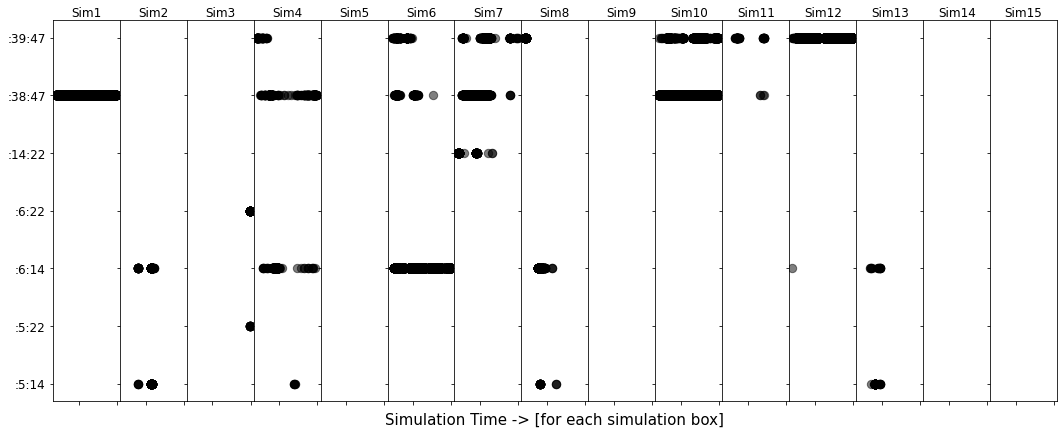

In [3]:
%%time
#BE CAREFUL OF tne allowed_residues, allowed_res
print('make sure allowed residues are checked for SPECIFIC protamine')
allowed_res= [5,6,14,22,38,39,47]
merged_s_calpha_cbeta_commonpairs=pd.concat([pd.concat([temp_bull_s,temp_bull_calpha,temp_bull_calpha_cbeta],axis=1)[['sim','frames']].iloc[:,2:4],
                                            merged_s_calpha_cbeta[common_close_pairs_all]],axis=1)

fig, axs = plt.subplots(1, 15,figsize=(18,7), sharex='row',sharey=True)
# Remove horizontal space between axes
fig.subplots_adjust(wspace=0,hspace=0)
for df in merged_s_calpha_cbeta_commonpairs_commonframes_combined:
    if int(df.columns[1].split(':')[1]) in allowed_res and int(df.columns[1].split(':')[2]) in allowed_res and df.columns[1]!=':38:47' and df.columns[1]!=':39:47':
        df_indices=df.index
        print(df.columns[1])
        for ind in df_indices:
            axs[int(merged_s_calpha_cbeta_commonpairs.loc[ind].sim)-1].scatter(merged_s_calpha_cbeta_commonpairs.loc[ind].frames/500,
                                                                   df.columns[1],
                                                                        s=70,alpha=0.5, color='black')
    elif int(df.columns[1].split(':')[1]) in allowed_res and int(df.columns[1].split(':')[2]) in allowed_res and df.columns[1]==':38:47':
        df_indices=df.index[1::10]
        print(df.columns[1])
        for ind in df_indices:
            axs[int(merged_s_calpha_cbeta_commonpairs.loc[ind].sim)-1].scatter(merged_s_calpha_cbeta_commonpairs.loc[ind].frames/500,
                                                                   df.columns[1],
                                                                        s=70,alpha=0.5, color='black')

    elif int(df.columns[1].split(':')[1]) in allowed_res and int(df.columns[1].split(':')[2]) in allowed_res and df.columns[1]==':39:47':
        df_indices=df.index[1::5]
        print(df.columns[1])
        for ind in df_indices:
            axs[int(merged_s_calpha_cbeta_commonpairs.loc[ind].sim)-1].scatter(merged_s_calpha_cbeta_commonpairs.loc[ind].frames/500,
                                                                   df.columns[1],
                                                                        s=70,alpha=0.5, color='black')
            

j=1
for ax in axs:
    ax.text(0.5,1.01,'Sim'+str(j),fontsize=12, 
            horizontalalignment='center',    
            transform=ax.transAxes)
    plt.setp(ax.get_yticklabels(),fontsize=12)
    ax.set_xticklabels([])
    j+=1

axs[7].set_xlabel('Simulation Time -> [for each simulation box]',fontsize=15)
plt.savefig('manuscript_revision/bull_disulfide_timescale.png',dpi=400,bbox_inches='tight')



In [7]:
merged_s_calpha_cbeta_commonpairs_commonframes_combined[11].index[1::5]

Int64Index([ 360073,  360203,  360232,  360242,  360249,  360265,  360286,
             360328,  360335,  360357,
            ...
            1199954, 1199959, 1199964, 1199969, 1199974, 1199979, 1199984,
            1199989, 1199994, 1199999],
           dtype='int64', length=8664)

In [2]:
%%time
#Calpha-calpha, calpha-cbeta, sulfur-sulfur - ALL TOGETHER in the same frame.(Jesse's suggestion)
#CORRECT CODE
temp_bull_s=pd.read_csv("bull_cys_tyr_dist.csv")
blank_df = pd.DataFrame()
for sim in temp_bull_s.sim.unique():
    temp_df = temp_bull_s[temp_bull_s.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
temp_bull_s = blank_df.copy()
del temp_df
del blank_df
temp_bull_s=temp_bull_s[temp_bull_s.sim!=14]
temp_bull_s=temp_bull_s[temp_bull_s.sim!=15]
temp_bull_calpha=pd.read_csv("bull_cys_tyr_dist_C_alpha.csv")
blank_df = pd.DataFrame()
for sim in temp_bull_calpha.sim.unique():
    temp_df = temp_bull_calpha[temp_bull_calpha.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
temp_bull_calpha = blank_df.copy()
del temp_df
del blank_df
temp_bull_calpha=temp_bull_calpha[temp_bull_calpha.sim!=14]
temp_bull_calpha=temp_bull_calpha[temp_bull_calpha.sim!=15]
temp_bull_calpha_cbeta=pd.read_csv("bull_cys_tyr_c_alpha_c_beta.csv")
blank_df = pd.DataFrame()
for sim in temp_bull_calpha_cbeta.sim.unique():
    temp_df = temp_bull_calpha_cbeta[temp_bull_calpha_cbeta.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
temp_bull_calpha_cbeta = blank_df.copy()
del temp_df
del blank_df
temp_bull_calpha_cbeta=temp_bull_calpha_cbeta[temp_bull_calpha_cbeta.sim!=14]
temp_bull_calpha_cbeta=temp_bull_calpha_cbeta[temp_bull_calpha_cbeta.sim!=15]
consecutive_pairs_s=[]
for i in range(2,len(temp_bull_s.columns)):
    first=int(temp_bull_s.columns[i].split(':')[1])
    second=int(temp_bull_s.columns[i].split(':')[2])
    if second-first==1:
        consecutive_pairs_s.append(temp_bull_s.columns[i])
    elif first-second==1:
        consecutive_pairs_s.append(temp_bull_s.columns[i])
max_s=temp_bull_s[consecutive_pairs_s].values.max()
max_calpha=7.5
max_calpha_cbeta=6.5
common_close_pairs=[]
temp_bull_combined=pd.concat([temp_bull_s,temp_bull_calpha,temp_bull_calpha_cbeta],axis=1)
temp_bull_combined=temp_bull_combined[temp_bull_combined.columns[temp_bull_combined.columns!='frames']]
temp_bull_combined=temp_bull_combined[temp_bull_combined.columns[temp_bull_combined.columns!='sim']]
s_calpha_cbeta_index=[[i, element] for i,element in enumerate(temp_bull_combined.columns)]
calpha_index=[]
calpha_cbeta_index=[]
for pair in s_calpha_cbeta_index:
    if '@CA' in pair[1]:
        calpha_index.append(pair[0])
for pair in s_calpha_cbeta_index:
    if 'CB' in pair[1]:
        calpha_cbeta_index.append(pair[0])
first_part=temp_bull_combined.iloc[:,0:calpha_index[0]]<=max_s
second_part=temp_bull_combined.iloc[:,calpha_index[0]:(calpha_cbeta_index[0])]<=max_calpha
third_part_pairs = temp_bull_combined.iloc[:,calpha_cbeta_index[0]:].columns
third_part_df    = temp_bull_combined.iloc[:,calpha_cbeta_index[0]:].copy()
j=0
final_pair=[int(third_part_pairs[len(third_part_pairs)-1].split('C')[0][1:len(third_part_pairs[len(third_part_pairs)-1].split('C')[0])]),
           int(third_part_pairs[len(third_part_pairs)-1].split('C')[1][2:len(third_part_pairs[len(third_part_pairs)-1].split('C')[1])])]
for column in range(len(third_part_pairs)):
    if j==0:
        first_first=int(third_part_pairs[column].split('C')[0][1:len(third_part_pairs[column].split('C')[0])])
        second_first=int(third_part_pairs[column].split('C')[1][2:len(third_part_pairs[column].split('C')[1])])
        first_second=int(third_part_pairs[column+1].split('C')[0][1:len(third_part_pairs[column+1].split('C')[0])])
        second_second=int(third_part_pairs[column+1].split('C')[1][2:len(third_part_pairs[column+1].split('C')[1])])
        if third_part_df[third_part_df<=max_calpha_cbeta][third_part_pairs[column]].isnull().all()==True and third_part_df[third_part_df<=max_calpha_cbeta][third_part_pairs[column+1]].isnull().all()==True:
            third_part_df.drop([third_part_pairs[column],third_part_pairs[column+1]],axis=1,inplace=True)
    elif j>0:
        first_first=int(third_part_pairs[column+j].split('C')[0][1:len(third_part_pairs[column+j].split('C')[0])])
        second_first=int(third_part_pairs[column+j].split('C')[1][2:len(third_part_pairs[column+j].split('C')[1])])
        first_second=int(third_part_pairs[column+j+1].split('C')[0][1:len(third_part_pairs[column+j+1].split('C')[0])])
        second_second=int(third_part_pairs[column+j+1].split('C')[1][2:len(third_part_pairs[column+j+1].split('C')[1])])
        if third_part_df[third_part_df<=max_calpha_cbeta][third_part_pairs[column+j]].isnull().all()==True and third_part_df[third_part_df<=max_calpha_cbeta][third_part_pairs[column+j+1]].isnull().all()==True:
            third_part_df.drop([third_part_pairs[column+j],third_part_pairs[column+j+1]],axis=1,inplace=True)
        if [first_second,second_second]==final_pair:
            break
    j+=1
first_part=temp_bull_combined.iloc[:,0:calpha_index[0]][first_part]
second_part=temp_bull_combined.iloc[:,calpha_index[0]:(calpha_cbeta_index[0])][second_part]
third_part_df=third_part_df[third_part_df<=max_calpha_cbeta]
temp_bull_s_calpha_cbeta_conditionpairs=pd.concat([pd.concat([first_part,second_part],axis=1).dropna(axis=1,how='all'),third_part_df],axis=1)
del first_part, second_part, third_part_df

s_calpha_cbeta_index=[[i, element] for i,element in enumerate(temp_bull_s_calpha_cbeta_conditionpairs.columns)]
calpha_index=[]
calpha_cbeta_index=[]
for pair in s_calpha_cbeta_index:
    if '@CA' in pair[1]:
        calpha_index.append(pair[0])
for pair in s_calpha_cbeta_index:
    if 'CB' in pair[1]:
        calpha_cbeta_index.append(pair[0])
first_part=temp_bull_s_calpha_cbeta_conditionpairs.iloc[:,:calpha_index[0]]
second_part=temp_bull_s_calpha_cbeta_conditionpairs.iloc[:,calpha_index[0]:calpha_cbeta_index[0]]
third_part=temp_bull_s_calpha_cbeta_conditionpairs.iloc[:,calpha_cbeta_index[0]:]
nonconsecutive_residues_s=[]
nonconsecutive_residues_calpha=[]
nonconsecutive_residues_calpha_cbeta=[]
for i in range(0,len(first_part.columns)):
    first=int(first_part.columns[i].split(':')[1])
    second=int(first_part.columns[i].split(':')[2])
    if abs(second-first)!=1:
        nonconsecutive_residues_s.append([[first,second],first_part.columns[i]])
for i in range(0,len(second_part.columns)):
    first=int(second_part.columns[i].split('@CA')[0][1:len(second_part.columns[i].split('@CA')[0])])
    second=int(second_part.columns[i].split('@CA')[1][1:len(second_part.columns[i].split('@CA')[1])])
    if abs(first-second)!=1:
        nonconsecutive_residues_calpha.append([[first,second],second_part.columns[i]])
for i in range(0,len(third_part.columns)):
    first=int(third_part.columns[i].split('C')[0][1:len(third_part.columns[i].split('C')[0])])
    second=int(third_part.columns[i].split('C')[1][2:len(third_part.columns[i].split('C')[1])])
    if abs(second-first)!=1:
        nonconsecutive_residues_calpha_cbeta.append([[first,second],third_part.columns[i]])
residue_s_list=[residue_pair[0] for residue_pair in nonconsecutive_residues_s]
residue_calpha_list=[residue_pair[0] for residue_pair in nonconsecutive_residues_calpha]
residue_calpha_cbeta_list=[residue_pair[0] for residue_pair in nonconsecutive_residues_calpha_cbeta]
common_close_pairs=[]
#because i am expecting nonconsecutive_residues_calpha_cbeta to be biggest since it has Calpha-Cbeta and Cbeta-Calpha pairs
for pair in residue_calpha_cbeta_list:
    if pair in residue_s_list:
        if pair in residue_calpha_list:
            common_close_pairs.append(pair)
common_close_pairs_all=[]
for pair in nonconsecutive_residues_s:
    if pair[0] in common_close_pairs:
        common_close_pairs_all.append(pair[1])
for pair in nonconsecutive_residues_calpha:
    if pair[0] in common_close_pairs:
        common_close_pairs_all.append(pair[1])
for pair in nonconsecutive_residues_calpha_cbeta:
    if pair[0] in common_close_pairs:
        common_close_pairs_all.append(pair[1])
merged_s_calpha_cbeta = pd.concat([first_part,second_part,third_part],axis=1)
merged_s_calpha_cbeta_commonpairs=pd.concat([pd.concat([temp_bull_s,temp_bull_calpha,temp_bull_calpha_cbeta],axis=1)[['sim','frames']].iloc[:,2:4],
                                            merged_s_calpha_cbeta[common_close_pairs_all]],axis=1)
merged_s_calpha_cbeta_commonpairs_commonframes_all=list()
merged_s_calpha_cbeta_commonpairs_commonframes_first=list()
merged_s_calpha_cbeta_commonpairs_commonframes_second=list()
merged_s_calpha_cbeta_commonpairs_commonframes_combined=list()
s_calpha_cbeta_index=[[i, element] for i,element in enumerate(merged_s_calpha_cbeta_commonpairs.columns)]
calpha_index=[]
calpha_cbeta_index=[]
for pair in s_calpha_cbeta_index:
    if '@CA' in pair[1]:
        calpha_index.append(pair[0])
        
for pair in s_calpha_cbeta_index:
    if 'CB' in pair[1]:
        calpha_cbeta_index.append(pair[0])
        
for i,j,k in zip(range(2,len(merged_s_calpha_cbeta_commonpairs.columns[0:calpha_index[0]])),
              range(calpha_index[0],calpha_index[0]+len(merged_s_calpha_cbeta_commonpairs.columns[calpha_index[0]:calpha_cbeta_index[0]])),
                range(calpha_cbeta_index[0],calpha_cbeta_index[0]+len(merged_s_calpha_cbeta_commonpairs.columns[calpha_cbeta_index[0]:len(merged_s_calpha_cbeta_commonpairs.columns)]))[1::2]):
    merged_s_calpha_cbeta_commonpairs_commonframes_all.append(merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1,k]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1,k]]])
    merged_s_calpha_cbeta_commonpairs_commonframes_first.append(merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1]]])
    merged_s_calpha_cbeta_commonpairs_commonframes_second.append(merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k]]])
    merged_s_calpha_cbeta_commonpairs_commonframes_combined.append(merged_s_calpha_cbeta_commonpairs[merged_s_calpha_cbeta_commonpairs.columns[[0,i,j,k-1,k]]].loc[merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k]]].index.union(merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1,k]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1,k]]].index.union(merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1]]].index))])
merged_s_calpha_cbeta_commonpairs_commonframes_combined_resid_simid=[]
merged_s_calpha_cbeta_commonpairs_commonframes_combined_resid_simid_frameid=[]
merged_s_calpha_cbeta_commonpairs_commonframes_combined_df=pd.DataFrame(columns=['residue_pair','total_number_of_frames','%frames'])
for index,dataframe in enumerate(merged_s_calpha_cbeta_commonpairs_commonframes_combined):
    merged_s_calpha_cbeta_commonpairs_commonframes_combined_resid_simid.append([dataframe.columns[1],dataframe.sim.unique()])
    merged_s_calpha_cbeta_commonpairs_commonframes_combined_df.loc[index,:]=[dataframe.columns[1],len(dataframe),format(100*(len(dataframe)/len(merged_s_calpha_cbeta_commonpairs)),'2.2f')]
print(tabulate(merged_s_calpha_cbeta_commonpairs_commonframes_combined_resid_simid))
print(tabulate(merged_s_calpha_cbeta_commonpairs_commonframes_combined_df, headers = 'keys', tablefmt = 'pretty'))

        

------  ----------------------------------------
:5:14   [ 2  8 13]
:5:22   [3]
:5:3    [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
:6:14   [ 2  6  8 13]
:6:22   [3]
:6:3    [ 1  2  3  5  6  7  8  9 10 11 12 13]
:14:22  [7]
:14:3   [6]
:22:3   [4]
:38:47  [ 1  4  6  7 10 11]
:38:42  [ 1  2  4  7  8 10 11 13]
:39:47  [ 4  6  7  8 10 11 12]
:39:42  [ 1  2  4  7  8 11 12 13]
:47:42  [ 6  7  8 11 12]
------  ----------------------------------------
+----+--------------+------------------------+---------+
|    | residue_pair | total_number_of_frames | %frames |
+----+--------------+------------------------+---------+
| 0  |    :5:14     |          576           |  0.11   |
| 1  |    :5:22     |           11           |  0.00   |
| 2  |     :5:3     |         240097         |  46.17  |
| 3  |    :6:14     |         10680          |  2.05   |
| 4  |    :6:22     |          112           |  0.02   |
| 5  |     :6:3     |         214735         |  41.30  |
| 6  |    :14:22    |          244       

make sure allowed residues are checked for SPECIFIC protamine
:5:14
:5:22
:6:14
:6:22
:14:22
:38:47
:39:47
CPU times: user 26min 22s, sys: 57.8 s, total: 27min 20s
Wall time: 27min 24s


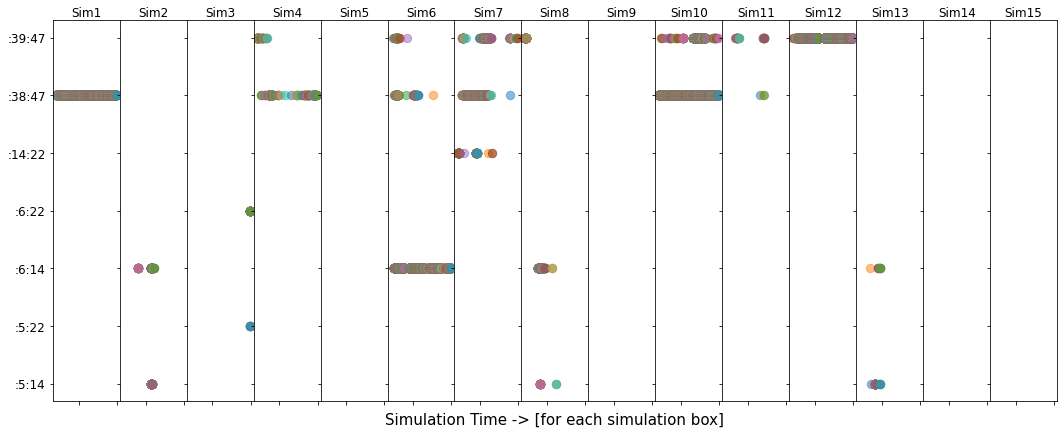

In [3]:
%%time
#BE CAREFUL OF tne allowed_residues, allowed_res
print('make sure allowed residues are checked for SPECIFIC protamine')
allowed_res= [5,6,14,22,38,39,47]
merged_s_calpha_cbeta_commonpairs=pd.concat([pd.concat([temp_bull_s,temp_bull_calpha,temp_bull_calpha_cbeta],axis=1)[['sim','frames']].iloc[:,2:4],
                                            merged_s_calpha_cbeta[common_close_pairs_all]],axis=1)

fig, axs = plt.subplots(1, 15,figsize=(18,7), sharex='row',sharey=True)
# Remove horizontal space between axes
fig.subplots_adjust(wspace=0,hspace=0)
for df in merged_s_calpha_cbeta_commonpairs_commonframes_combined:
    if int(df.columns[1].split(':')[1]) in allowed_res and int(df.columns[1].split(':')[2]) in allowed_res and df.columns[1]!=':38:47' and df.columns[1]!=':39:47':
        df_indices=df.index
        print(df.columns[1])
        for ind in df_indices:
            axs[int(merged_s_calpha_cbeta_commonpairs.loc[ind].sim)-1].scatter(merged_s_calpha_cbeta_commonpairs.loc[ind].frames/500,
                                                                   df.columns[1],
                                                                        s=70,alpha=0.5)
    elif int(df.columns[1].split(':')[1]) in allowed_res and int(df.columns[1].split(':')[2]) in allowed_res and df.columns[1]==':38:47':
        df_indices=df.index[1::10]
        print(df.columns[1])
        for ind in df_indices:
            axs[int(merged_s_calpha_cbeta_commonpairs.loc[ind].sim)-1].scatter(merged_s_calpha_cbeta_commonpairs.loc[ind].frames/500,
                                                                   df.columns[1],
                                                                        s=70,alpha=0.5)

    elif int(df.columns[1].split(':')[1]) in allowed_res and int(df.columns[1].split(':')[2]) in allowed_res and df.columns[1]==':39:47':
        df_indices=df.index[1::5]
        print(df.columns[1])
        for ind in df_indices:
            axs[int(merged_s_calpha_cbeta_commonpairs.loc[ind].sim)-1].scatter(merged_s_calpha_cbeta_commonpairs.loc[ind].frames/500,
                                                                   df.columns[1],
                                                                        s=70,alpha=0.5)
            

j=1
for ax in axs:
    ax.text(0.5,1.01,'Sim'+str(j),fontsize=12, 
            horizontalalignment='center',    
            transform=ax.transAxes)
    plt.setp(ax.get_yticklabels(),fontsize=12)
    ax.set_xticklabels([])
    j+=1

axs[7].set_xlabel('Simulation Time -> [for each simulation box]',fontsize=15)



In [4]:
%%time
#Calpha-calpha, calpha-cbeta, sulfur-sulfur - ALL TOGETHER in the same frame.(Jesse's suggestion)
#CORRECT CODE
temp_p1_s=pd.read_csv("p1_cys_tyr_dist.csv")
blank_df = pd.DataFrame()
for sim in temp_p1_s.sim.unique():
    temp_df = temp_p1_s[temp_p1_s.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
temp_p1_s = blank_df.copy()
del temp_df
del blank_df
temp_p1_s=temp_p1_s[temp_p1_s.sim!=13]
temp_p1_s=temp_p1_s[temp_p1_s.sim!=15]
temp_p1_calpha=pd.read_csv("p1_cys_tyr_dist_C_alpha.csv")
blank_df = pd.DataFrame()
for sim in temp_p1_calpha.sim.unique():
    temp_df = temp_p1_calpha[temp_p1_calpha.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
temp_p1_calpha = blank_df.copy()
del temp_df
del blank_df
temp_p1_calpha=temp_p1_calpha[temp_p1_calpha.sim!=13]
temp_p1_calpha=temp_p1_calpha[temp_p1_calpha.sim!=15]
temp_p1_calpha_cbeta=pd.read_csv("p1_cys_tyr_c_alpha_c_beta.csv")
blank_df = pd.DataFrame()
for sim in temp_p1_calpha_cbeta.sim.unique():
    temp_df = temp_p1_calpha_cbeta[temp_p1_calpha_cbeta.sim==sim].iloc[-40000:,:]
    blank_df = blank_df.append(temp_df)
temp_p1_calpha_cbeta = blank_df.copy()
del temp_df
del blank_df
temp_p1_calpha_cbeta=temp_p1_calpha_cbeta[temp_p1_calpha_cbeta.sim!=13]
temp_p1_calpha_cbeta=temp_p1_calpha_cbeta[temp_p1_calpha_cbeta.sim!=15]
consecutive_pairs_s=[]
for i in range(2,len(temp_p1_s.columns)):
    first=int(temp_p1_s.columns[i].split(':')[1])
    second=int(temp_p1_s.columns[i].split(':')[2])
    if second-first==1:
        consecutive_pairs_s.append(temp_p1_s.columns[i])
    elif first-second==1:
        consecutive_pairs_s.append(temp_p1_s.columns[i])
max_s=temp_p1_s[consecutive_pairs_s].values.max()
max_calpha=7.5
max_calpha_cbeta=6.5
common_close_pairs=[]
temp_p1_combined=pd.concat([temp_p1_s,temp_p1_calpha,temp_p1_calpha_cbeta],axis=1)
temp_p1_combined=temp_p1_combined[temp_p1_combined.columns[temp_p1_combined.columns!='frames']]
temp_p1_combined=temp_p1_combined[temp_p1_combined.columns[temp_p1_combined.columns!='sim']]
s_calpha_cbeta_index=[[i, element] for i,element in enumerate(temp_p1_combined.columns)]
calpha_index=[]
calpha_cbeta_index=[]
for pair in s_calpha_cbeta_index:
    if '@CA' in pair[1]:
        calpha_index.append(pair[0])
for pair in s_calpha_cbeta_index:
    if 'CB' in pair[1]:
        calpha_cbeta_index.append(pair[0])
first_part=temp_p1_combined.iloc[:,0:calpha_index[0]]<=max_s
second_part=temp_p1_combined.iloc[:,calpha_index[0]:(calpha_cbeta_index[0])]<=max_calpha
third_part_pairs = temp_p1_combined.iloc[:,calpha_cbeta_index[0]:].columns
third_part_df    = temp_p1_combined.iloc[:,calpha_cbeta_index[0]:].copy()
j=0
final_pair=[int(third_part_pairs[len(third_part_pairs)-1].split('C')[0][1:len(third_part_pairs[len(third_part_pairs)-1].split('C')[0])]),
           int(third_part_pairs[len(third_part_pairs)-1].split('C')[1][2:len(third_part_pairs[len(third_part_pairs)-1].split('C')[1])])]
for column in range(len(third_part_pairs)):
    if j==0:
        first_first=int(third_part_pairs[column].split('C')[0][1:len(third_part_pairs[column].split('C')[0])])
        second_first=int(third_part_pairs[column].split('C')[1][2:len(third_part_pairs[column].split('C')[1])])
        first_second=int(third_part_pairs[column+1].split('C')[0][1:len(third_part_pairs[column+1].split('C')[0])])
        second_second=int(third_part_pairs[column+1].split('C')[1][2:len(third_part_pairs[column+1].split('C')[1])])
        if third_part_df[third_part_df<=max_calpha_cbeta][third_part_pairs[column]].isnull().all()==True and third_part_df[third_part_df<=max_calpha_cbeta][third_part_pairs[column+1]].isnull().all()==True:
            third_part_df.drop([third_part_pairs[column],third_part_pairs[column+1]],axis=1,inplace=True)
    elif j>0:
        first_first=int(third_part_pairs[column+j].split('C')[0][1:len(third_part_pairs[column+j].split('C')[0])])
        second_first=int(third_part_pairs[column+j].split('C')[1][2:len(third_part_pairs[column+j].split('C')[1])])
        first_second=int(third_part_pairs[column+j+1].split('C')[0][1:len(third_part_pairs[column+j+1].split('C')[0])])
        second_second=int(third_part_pairs[column+j+1].split('C')[1][2:len(third_part_pairs[column+j+1].split('C')[1])])
        if third_part_df[third_part_df<=max_calpha_cbeta][third_part_pairs[column+j]].isnull().all()==True and third_part_df[third_part_df<=max_calpha_cbeta][third_part_pairs[column+j+1]].isnull().all()==True:
            third_part_df.drop([third_part_pairs[column+j],third_part_pairs[column+j+1]],axis=1,inplace=True)
        if [first_second,second_second]==final_pair:
            break
    j+=1
first_part=temp_p1_combined.iloc[:,0:calpha_index[0]][first_part]
second_part=temp_p1_combined.iloc[:,calpha_index[0]:(calpha_cbeta_index[0])][second_part]
third_part_df=third_part_df[third_part_df<=max_calpha_cbeta]
temp_p1_s_calpha_cbeta_conditionpairs=pd.concat([pd.concat([first_part,second_part],axis=1).dropna(axis=1,how='all'),third_part_df],axis=1)
del first_part, second_part, third_part_df

s_calpha_cbeta_index=[[i, element] for i,element in enumerate(temp_p1_s_calpha_cbeta_conditionpairs.columns)]
calpha_index=[]
calpha_cbeta_index=[]
for pair in s_calpha_cbeta_index:
    if '@CA' in pair[1]:
        calpha_index.append(pair[0])
for pair in s_calpha_cbeta_index:
    if 'CB' in pair[1]:
        calpha_cbeta_index.append(pair[0])
first_part=temp_p1_s_calpha_cbeta_conditionpairs.iloc[:,:calpha_index[0]]
second_part=temp_p1_s_calpha_cbeta_conditionpairs.iloc[:,calpha_index[0]:calpha_cbeta_index[0]]
third_part=temp_p1_s_calpha_cbeta_conditionpairs.iloc[:,calpha_cbeta_index[0]:]
nonconsecutive_residues_s=[]
nonconsecutive_residues_calpha=[]
nonconsecutive_residues_calpha_cbeta=[]
for i in range(0,len(first_part.columns)):
    first=int(first_part.columns[i].split(':')[1])
    second=int(first_part.columns[i].split(':')[2])
    if abs(second-first)!=1:
        nonconsecutive_residues_s.append([[first,second],first_part.columns[i]])
for i in range(0,len(second_part.columns)):
    first=int(second_part.columns[i].split('@CA')[0][1:len(second_part.columns[i].split('@CA')[0])])
    second=int(second_part.columns[i].split('@CA')[1][1:len(second_part.columns[i].split('@CA')[1])])
    if abs(first-second)!=1:
        nonconsecutive_residues_calpha.append([[first,second],second_part.columns[i]])
for i in range(0,len(third_part.columns)):
    first=int(third_part.columns[i].split('C')[0][1:len(third_part.columns[i].split('C')[0])])
    second=int(third_part.columns[i].split('C')[1][2:len(third_part.columns[i].split('C')[1])])
    if abs(second-first)!=1:
        nonconsecutive_residues_calpha_cbeta.append([[first,second],third_part.columns[i]])
residue_s_list=[residue_pair[0] for residue_pair in nonconsecutive_residues_s]
residue_calpha_list=[residue_pair[0] for residue_pair in nonconsecutive_residues_calpha]
residue_calpha_cbeta_list=[residue_pair[0] for residue_pair in nonconsecutive_residues_calpha_cbeta]
common_close_pairs=[]
#because i am expecting nonconsecutive_residues_calpha_cbeta to be biggest since it has Calpha-Cbeta and Cbeta-Calpha pairs
for pair in residue_calpha_cbeta_list:
    if pair in residue_s_list:
        if pair in residue_calpha_list:
            common_close_pairs.append(pair)
common_close_pairs_all=[]
for pair in nonconsecutive_residues_s:
    if pair[0] in common_close_pairs:
        common_close_pairs_all.append(pair[1])
for pair in nonconsecutive_residues_calpha:
    if pair[0] in common_close_pairs:
        common_close_pairs_all.append(pair[1])
for pair in nonconsecutive_residues_calpha_cbeta:
    if pair[0] in common_close_pairs:
        common_close_pairs_all.append(pair[1])
merged_s_calpha_cbeta = pd.concat([first_part,second_part,third_part],axis=1)
merged_s_calpha_cbeta_commonpairs=pd.concat([pd.concat([temp_p1_s,temp_p1_calpha,temp_p1_calpha_cbeta],axis=1)[['sim','frames']].iloc[:,2:4],
                                            merged_s_calpha_cbeta[common_close_pairs_all]],axis=1)
merged_s_calpha_cbeta_commonpairs_commonframes_all=list()
merged_s_calpha_cbeta_commonpairs_commonframes_first=list()
merged_s_calpha_cbeta_commonpairs_commonframes_second=list()
merged_s_calpha_cbeta_commonpairs_commonframes_combined=list()
s_calpha_cbeta_index=[[i, element] for i,element in enumerate(merged_s_calpha_cbeta_commonpairs.columns)]
calpha_index=[]
calpha_cbeta_index=[]
for pair in s_calpha_cbeta_index:
    if '@CA' in pair[1]:
        calpha_index.append(pair[0])
        
for pair in s_calpha_cbeta_index:
    if 'CB' in pair[1]:
        calpha_cbeta_index.append(pair[0])
        
for i,j,k in zip(range(2,len(merged_s_calpha_cbeta_commonpairs.columns[0:calpha_index[0]])),
              range(calpha_index[0],calpha_index[0]+len(merged_s_calpha_cbeta_commonpairs.columns[calpha_index[0]:calpha_cbeta_index[0]])),
                range(calpha_cbeta_index[0],calpha_cbeta_index[0]+len(merged_s_calpha_cbeta_commonpairs.columns[calpha_cbeta_index[0]:len(merged_s_calpha_cbeta_commonpairs.columns)]))[1::2]):
    merged_s_calpha_cbeta_commonpairs_commonframes_all.append(merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1,k]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1,k]]])
    merged_s_calpha_cbeta_commonpairs_commonframes_first.append(merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1]]])
    merged_s_calpha_cbeta_commonpairs_commonframes_second.append(merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k]]])
    merged_s_calpha_cbeta_commonpairs_commonframes_combined.append(merged_s_calpha_cbeta_commonpairs[merged_s_calpha_cbeta_commonpairs.columns[[0,i,j,k-1,k]]].loc[merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k]]].index.union(merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1,k]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1,k]]].index.union(merged_s_calpha_cbeta_commonpairs.dropna(axis=0,how='any',subset=merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1]])[merged_s_calpha_cbeta_commonpairs.columns[[i,j,k-1]]].index))])
merged_s_calpha_cbeta_commonpairs_commonframes_combined_resid_simid=[]
merged_s_calpha_cbeta_commonpairs_commonframes_combined_resid_simid_frameid=[]
merged_s_calpha_cbeta_commonpairs_commonframes_combined_df=pd.DataFrame(columns=['residue_pair','total_number_of_frames','%frames'])
for index,dataframe in enumerate(merged_s_calpha_cbeta_commonpairs_commonframes_combined):
    merged_s_calpha_cbeta_commonpairs_commonframes_combined_resid_simid.append([dataframe.columns[1],dataframe.sim.unique()])
    merged_s_calpha_cbeta_commonpairs_commonframes_combined_df.loc[index,:]=[dataframe.columns[1],len(dataframe),format(100*(len(dataframe)/len(merged_s_calpha_cbeta_commonpairs)),'2.2f')]
print(tabulate(merged_s_calpha_cbeta_commonpairs_commonframes_combined_resid_simid))
print(tabulate(merged_s_calpha_cbeta_commonpairs_commonframes_combined_df, headers = 'keys', tablefmt = 'pretty'))

        

------  ----------------------------------------
:5:3    [ 1  2  3  4  5  6  7  8  9 10 11 12 14]
:5:14   [ 4  5  9 12]
:5:15   [ 4  5 11 14]
:6:3    [ 1  2  3  4  5  6  7  8  9 10 11 12 14]
:6:14   [ 3  5 10 12]
:6:15   [ 5 11 14]
:29:38  [ 9 10 14]
:29:39  [ 2 10 12 14]
:38:47  [ 1  4  5 12]
:38:43  [ 2  4  5 10 12 14]
:39:47  [4]
:39:43  [ 4  5 11 12 14]
:47:43  [ 1  3  4 10 11 14]
------  ----------------------------------------
+----+--------------+------------------------+---------+
|    | residue_pair | total_number_of_frames | %frames |
+----+--------------+------------------------+---------+
| 0  |     :5:3     |         91937          |  17.68  |
| 1  |    :5:14     |          8503          |  1.64   |
| 2  |    :5:15     |          6351          |  1.22   |
| 3  |     :6:3     |         56712          |  10.91  |
| 4  |    :6:14     |          1880          |  0.36   |
| 5  |    :6:15     |          8467          |  1.63   |
| 6  |    :29:38    |          983           |  0.

make sure allowed residues are checked for SPECIFIC protamine
:6:14
:29:38
:29:39
:38:47
:39:47
CPU times: user 6min 51s, sys: 11.2 s, total: 7min 3s
Wall time: 7min 3s


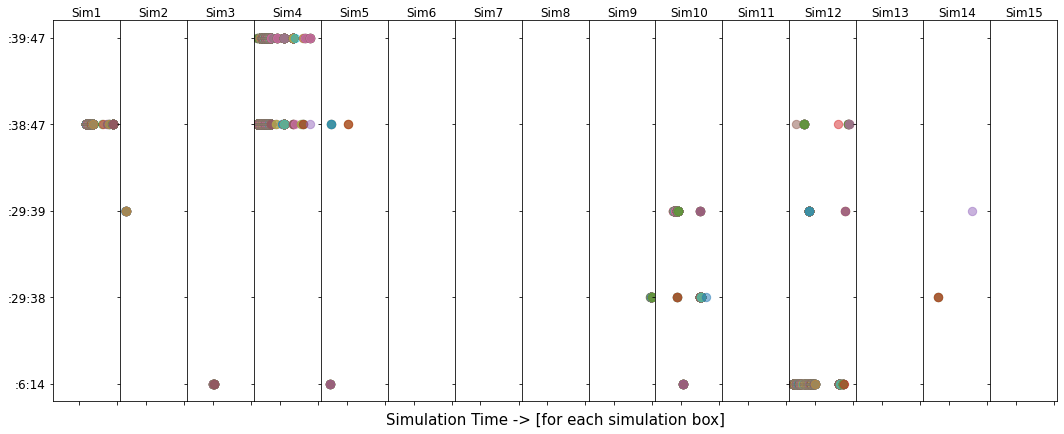

In [5]:
%%time
#BE CAREFUL OF tne allowed_residues, allowed_res
print('make sure allowed residues are checked for SPECIFIC protamine')
allowed_res= [6,14,29,38,39,47]
merged_s_calpha_cbeta_commonpairs=pd.concat([pd.concat([temp_p1_s,temp_p1_calpha,temp_p1_calpha_cbeta],axis=1)[['sim','frames']].iloc[:,2:4],
                                            merged_s_calpha_cbeta[common_close_pairs_all]],axis=1)

fig, axs = plt.subplots(1, 15,figsize=(18,7), sharex='row',sharey=True)
# Remove horizontal space between axes
fig.subplots_adjust(wspace=0,hspace=0)
for df in merged_s_calpha_cbeta_commonpairs_commonframes_combined:
    if int(df.columns[1].split(':')[1]) in allowed_res and int(df.columns[1].split(':')[2]) in allowed_res:
        df_indices=df.index
        print(df.columns[1])        
        for ind in df_indices:
            axs[int(merged_s_calpha_cbeta_commonpairs.loc[ind].sim)-1].scatter(merged_s_calpha_cbeta_commonpairs.loc[ind].frames/500,
                                                                   df.columns[1],
                                                                        s=70,alpha=0.5)
j=1
for ax in axs:
    ax.text(0.5,1.01,'Sim'+str(j),fontsize=12, 
            horizontalalignment='center',    
            transform=ax.transAxes)
    plt.setp(ax.get_yticklabels(),fontsize=12)
    ax.set_xticklabels([])
    j+=1

axs[7].set_xlabel('Simulation Time -> [for each simulation box]',fontsize=15)

